# K-Nearest Neighbors (KNN)

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler

## 1 - Abertura da base de dados Iris na Pandas DataFrame

In [3]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/refs/heads/main/iris.csv')
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2 - Sepação da base de dados iris entre conjunto de exemplos (X) e atributo alvo (y)

In [4]:
y = df_iris['class']
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


In [5]:
X = df_iris.drop(columns = ['class'])
print(X)

     sepallength  sepalwidth  petallength  petalwidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]


## 3 - Discretização do atributo alvo (ClassLabel - y) 

In [6]:
label_dic = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

y = y.map(label_dic)
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


## 4 - Exbaralhamento e criação dos conjuntos de teste e de treinamento

In [7]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [8]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [9]:
X_shuffled, y_shuffled = X.index[shuffled_indices], y.index[shuffled_indices]

In [10]:
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

## 5 - Repetindo os passos anteriores utilizando Scikit-Learn

In [11]:
iris = load_iris()
X, y = iris.data[:, : 2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, shuffle = True)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 2)
(105,)
(45, 2)
(45,)


## 6 - Inicialização de um modelo KNN

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 7 - Predições utilizando o conjunto de teste

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Acurácia: %.2f%%' % accuracy)

Acurácia: 80.00%


## 8 - Visualizar a fronteira de decisões

Os trechos de código abaixo funcional apenas para dois atributos

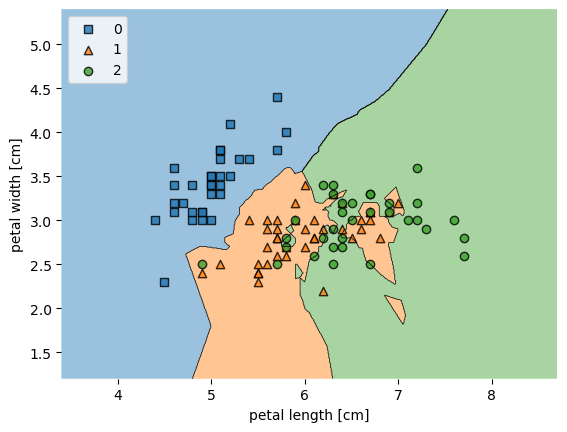

In [16]:
plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

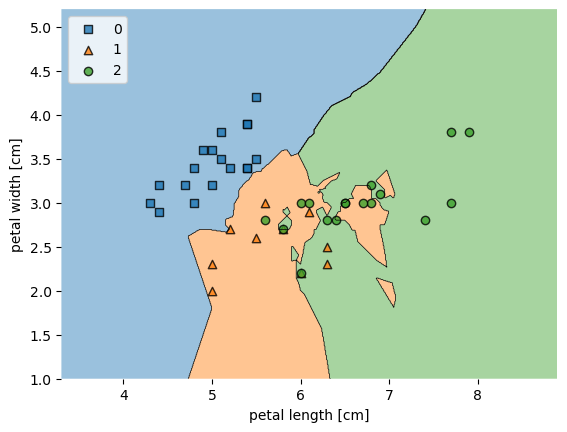

In [17]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## 9 - Treinamento e teste de modelo considerando todos os atributos

In [18]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, shuffle = True)

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn_model.predict(X_test)

In [21]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Acurácia: %.2f%%' % accuracy)

Acurácia: 95.56%


### Considerando k = 1

In [22]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_pred = knn_model.predict(X_test)

In [24]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Acurácia: %.2f%%' % accuracy)

Acurácia: 91.11%


### k = 5

In [25]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn_model.predict(X_test)

In [27]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Acurácia: %.2f%%' % accuracy)

Acurácia: 97.78%


### 10 - Normalização dos dados antes do treinamento e teste

In [28]:
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

In [29]:
XN_train, XN_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 123, shuffle = True)

In [30]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(XN_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn_model.predict(XN_test)

In [32]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Acurácia: %.2f%%' % accuracy)

Acurácia: 95.56%


Repita os passos de 10 para diferentes valores de k